In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import xgboost as xgb

import tensorflow as tf
import keras
from tensorflow.keras import layers

# Loading the data

In [2]:
df = pd.read_csv('df_train_preprocessed.csv')
df

,Sequence,Label,Length,A,C,D,E,F,G,H,...,pos15,pos16,pos17,pos18,pos19,pos20,pos21,pos22,pos23,pos24
0,AAAFVNQHLCGSHLVEAL,0,18,4,1,0,1,1,1,2,...,5,1,12,0,0,0,0,0,0,0
1,AAAKEAEAHEEI,1,12,5,0,0,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,AAALPGQPESPDIPG,1,15,3,0,1,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,AAALPGQPPDIPG,1,13,3,0,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4,AACFKEGSFDEDGFYAKV,0,18,3,1,2,2,3,2,0,...,1,11,22,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,YYLMDLSYSMKDDLWSI,1,17,0,0,3,0,0,0,0,...,19,9,0,0,0,0,0,0,0,0
6390,YYRKQLSPLEGGGWLVASG,0,19,1,0,0,1,0,4,0,...,22,1,19,7,0,0,0,0,0,0
6391,YYSLVTFGQGT,0,11,0,0,0,0,1,2,0,...,0,0,0,0,0,0,0,0,0,0
6392,YYSTPIEYFNKYSNGNKSVWCQANN,1,25,1,1,0,1,1,1,0,...,14,11,19,22,23,3,17,1,14,14


In [3]:
X = df.loc[:, 'Length':]
Y = df['Label']
X.shape, Y.shape

((6394, 46), (6394,))

In [5]:
Xtrain, Xval, Ytrain, Yval = train_test_split(X, Y, test_size = 0.25, random_state = 100)
Xtrain.shape, Xval.shape

((4795, 46), (1599, 46))

# Trying ML models

In [5]:
lr = LogisticRegression(max_iter = 100000000)
grid1 = {'solver':['newton-cg', 'sag', 'lbfgs']}

bestLR = GridSearchCV(lr, grid1, cv = 5)
bestLR.fit(Xtrain, Ytrain)
bestLR.best_estimator_

LogisticRegression(max_iter=100000000, solver='newton-cg')

In [6]:
bestLR.score(Xval, Yval)

0.7066916823014384

In [7]:
rf = RandomForestClassifier()
grid2 = {'n_estimators':[10, 50, 100, 150, 200],
        'max_depth':[5, 6, 7, 8]}

bestRF = GridSearchCV(rf, grid2, cv = 5)
bestRF.fit(Xtrain, Ytrain)
bestRF.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=150)

In [8]:
bestRF.score(Xval, Yval)

0.7235772357723578

In [11]:
scores = []
K = range(2, 50, 2)

for i in K:
    clf = KNeighborsClassifier(n_neighbors = i)
    score = cross_val_score(clf, Xtrain, Ytrain, cv = 5)
    print(i, score.mean())
    scores.append(score.mean())

2 0.5724713242961419
4 0.5912408759124087
6 0.6014598540145986
8 0.6118873826903024
10 0.6095933263816475
12 0.6154327424400418
14 0.6239833159541188
16 0.6223149113660063
18 0.6277372262773723
20 0.6273201251303442
22 0.6339937434827946
24 0.6314911366006257
26 0.6319082377476539
28 0.6319082377476539
30 0.6354535974973932
32 0.6371220020855057
34 0.6358706986444214
36 0.6379562043795621
38 0.6408759124087592
40 0.6358706986444213
42 0.635036496350365
44 0.632325338894682
46 0.6358706986444214
48 0.635036496350365


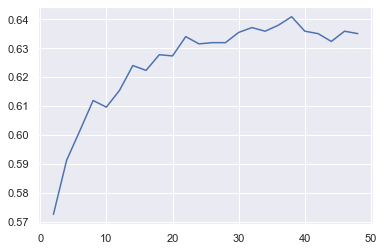

In [10]:
plt.plot(K, scores)

In [12]:
knn = KNeighborsClassifier(n_neighbors = 38, p = 2, weights = 'uniform', metric = 'minkowski')
knn.fit(Xtrain, Ytrain)

KNeighborsClassifier(n_neighbors=38)

In [13]:
knn.score(Xval, Yval)   

0.649155722326454

In [14]:
xgbc = xgb.XGBClassifier()
xgbc.fit(Xtrain, Ytrain)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=256, max_cat_threshold=64, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [15]:
xgbc.score(Xval, Yval)   

0.7073170731707317

# Trying deep learning models

In [7]:
model = keras.Sequential([
    layers.Input(shape = (46,)),
    
    layers.Dense(units = 64, activation = 'relu'),
    layers.Dropout(0.2),
    
    layers.Dense(units = 32, activation = 'relu'),
    layers.Dropout(0.2),
    
    layers.Dense(units = 16, activation = 'relu'),
    layers.Dropout(0.2),
    
    layers.Dense(units = 1, activation = 'sigmoid'),
    
    
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                3008      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dropout_4 (Dropout)         (None, 32)                0         
                                                                 
 dense_6 (Dense)             (None, 16)                528       
                                                                 
 dropout_5 (Dropout)         (None, 16)                0         
                                                                 
 dense_7 (Dense)             (None, 1)                

In [8]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = 'accuracy')

In [9]:
hist = model.fit(Xtrain, Ytrain, batch_size = 32, epochs = 50, validation_data = (Xval, Yval))

Epoch 1/50
150/150 [==============================] - 19s 13ms/step - loss: 1.1237 - accuracy: 0.5389 - val_loss: 0.6741 - val_accuracy: 0.5622
Epoch 2/50
150/150 [==============================] - 0s 3ms/step - loss: 0.7019 - accuracy: 0.5721 - val_loss: 0.6636 - val_accuracy: 0.6110
Epoch 3/50
150/150 [==============================] - 1s 4ms/step - loss: 0.6792 - accuracy: 0.5862 - val_loss: 0.6543 - val_accuracy: 0.6216
Epoch 4/50
150/150 [==============================] - 1s 4ms/step - loss: 0.6688 - accuracy: 0.6006 - val_loss: 0.6514 - val_accuracy: 0.6348
Epoch 5/50
150/150 [==============================] - 0s 3ms/step - loss: 0.6584 - accuracy: 0.6261 - val_loss: 0.6386 - val_accuracy: 0.6523
Epoch 6/50
150/150 [==============================] - 0s 3ms/step - loss: 0.6531 - accuracy: 0.6231 - val_loss: 0.6346 - val_accuracy: 0.6529
Epoch 7/50
150/150 [==============================] - 1s 4ms/step - loss: 0.6434 - accuracy: 0.6342 - val_loss: 0.6237 - val_accuracy: 0.6535
Epoc

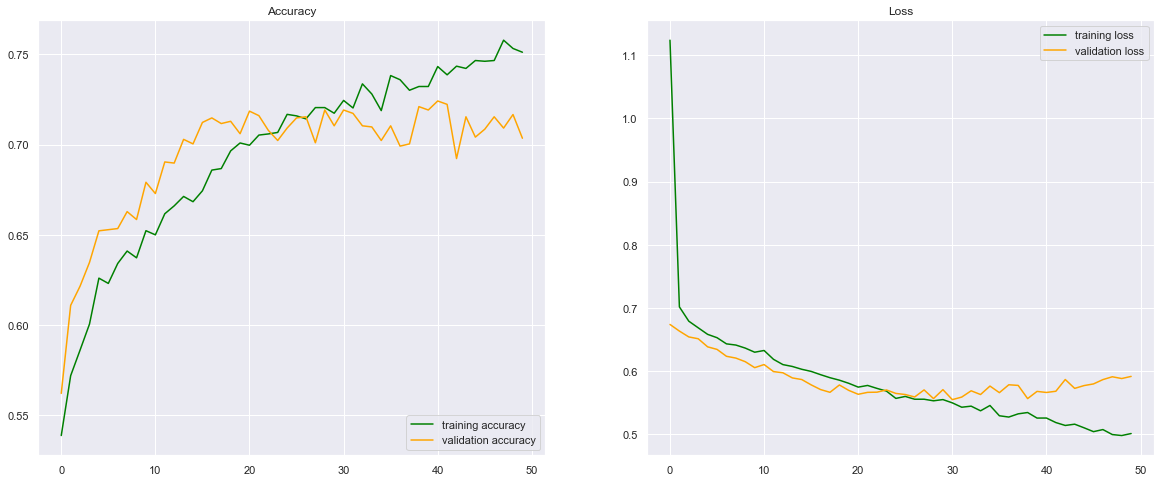

In [12]:
plt.figure(figsize = (20, 8))

epochs = range(50)

plt.subplot(1,2,1)
train_acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
plt.plot(epochs, train_acc, label = 'training accuracy', color = 'green')
plt.plot(epochs, val_acc, label = 'validation accuracy', color = 'orange')
plt.title('Accuracy')
plt.legend(loc = 'lower right')



plt.subplot(1,2,2)
train_loss = hist.history['loss']
val_loss = hist.history['val_loss']
plt.plot(epochs, train_loss, label = 'training loss', color = 'green')
plt.plot(epochs, val_loss, label = 'validation loss', color = 'orange')
plt.title('Loss')
plt.legend(loc = 'upper right')

plt.show()

In [14]:
Yval_pred = model.predict(Xval)
Yval_pred = np.round(Yval_pred)

50/50 [==============================] - 0s 2ms/step


In [15]:
print(classification_report(Yval, Yval_pred))

              precision    recall  f1-score   support

           0       0.73      0.66      0.70       818
           1       0.68      0.75      0.71       781

    accuracy                           0.70      1599
   macro avg       0.71      0.70      0.70      1599
weighted avg       0.71      0.70      0.70      1599



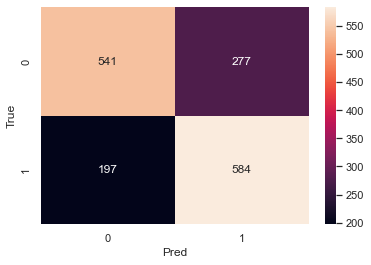

In [16]:
cm = confusion_matrix(Yval, Yval_pred)
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Pred')
plt.ylabel('True')
plt.show()

# Predicting the testing data

In [18]:
dft = pd.read_csv('test_preprocessed.csv')
dft

,ID,Sequence,Length,A,C,D,E,F,G,H,...,pos15,pos16,pos17,pos18,pos19,pos20,pos21,pos22,pos23,pos24
0,10001,AAAEQLKTTRNAYHQKY,17,4,0,0,1,0,0,1,...,11,25,0,0,0,0,0,0,0,0
1,10002,AAALAPTQTRAGPHSL,16,5,0,0,0,0,1,1,...,12,0,0,0,0,0,0,0,0,0
2,10003,AADLALATVNEL,12,4,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10004,AAHPDKRGEDQAEGLPEEVRG,21,3,0,2,4,0,3,1,...,16,5,5,22,18,7,0,0,0,0
4,10005,AAKPKRAKASKKSTDHPKYS,20,4,0,1,0,0,0,1,...,8,16,11,25,19,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,11594,YVLSSLHIYWGKEDDYGSNH,20,0,0,2,1,0,2,2,...,25,7,19,14,8,0,0,0,0,0
1594,11595,YVPDDDWFCPNCQ,13,0,2,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1595,11596,YYKDKATFGCHDGYS,15,1,1,2,0,1,2,1,...,0,0,0,0,0,0,0,0,0,0
1596,11597,YYNKVPVEKRVFKNL,15,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
Xt = dft.loc[:, 'Length':]
Xt.shape

(1598, 46)

In [20]:
Yt = model.predict(Xt)

50/50 [==============================] - 0s 2ms/step


In [21]:
Yt = np.round(Yt)

In [22]:
Yt

array([[0.],
       [0.],
       [0.],
       ...,
       [1.],
       [1.],
       [1.]], dtype=float32)

In [25]:
Yt.shape

(1598, 1)

In [30]:
Ytr = Yt.ravel()

In [23]:
ids = dft['ID']

In [31]:
predi = pd.DataFrame({'ID':ids, 'Label':Ytr})
predi

,ID,Label
0,10001,0.0
1,10002,0.0
2,10003,0.0
3,10004,1.0
4,10005,0.0
...,...,...
1593,11594,1.0
1594,11595,1.0
1595,11596,1.0
1596,11597,1.0


In [32]:
predi.to_csv('test_predictions.csv', index = False)